In [1]:
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import numpy

import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# problem constants:
ONE_MAX_LENGTH = 100  # length of bit string to be optimized

# Genetic Algorithm constants:
POPULATION_SIZE = 1000
P_CROSSOVER = 0.9  # probability for crossover
P_MUTATION = 0.1   # probability for mutating an individual
MAX_GENERATIONS = 50
HALL_OF_FAME_SIZE = 10


In [3]:
# set the random seed:
RANDOM_SEED = 42
random.seed(RANDOM_SEED)

toolbox = base.Toolbox()

In [4]:
# create an operator that randomly returns 0 or 1:
toolbox.register("zeroOrOne", random.randint, 0, 1)

# define a single objective, maximizing fitness strategy:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))

# create the Individual class based on list:
creator.create("Individual", list, fitness=creator.FitnessMax)

# create the individual operator to fill up an Individual instance:
toolbox.register("individualCreator", tools.initRepeat, creator.Individual, toolbox.zeroOrOne, ONE_MAX_LENGTH)

# create the population operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)


In [5]:
# fitness calculation:
# compute the number of '1's in the individual
def oneMaxFitness(individual):
    return sum(individual),  # return a tuple

In [6]:
toolbox.register("evaluate", oneMaxFitness)

# genetic operators:

# Tournament selection with tournament size of 3:
toolbox.register("select", tools.selTournament, tournsize=3)

# Single-point crossover:
toolbox.register("mate", tools.cxOnePoint)

# Flip-bit mutation:
# indpb: Independent probability for each attribute to be flipped
toolbox.register("mutate", tools.mutFlipBit, indpb=1.0/ONE_MAX_LENGTH)

gen	nevals	max	avg  
0  	1000  	64 	50.11
1  	887   	69 	54.084
2  	910   	70 	57.628
3  	918   	71 	60.481
4  	906   	76 	63.142
5  	922   	76 	65.738
6  	928   	79 	68.314
7  	903   	81 	70.63 
8  	898   	80 	72.922
9  	917   	83 	75.038
10 	932   	85 	77.1  
11 	929   	86 	78.944
12 	919   	88 	80.838
13 	919   	91 	82.588
14 	918   	91 	84.308
15 	913   	92 	86.013
16 	918   	93 	87.562
17 	889   	94 	88.95 
18 	913   	95 	90.119
19 	915   	96 	91.349
20 	907   	96 	92.493
21 	914   	97 	93.552
22 	932   	98 	94.559
23 	897   	99 	95.47 
24 	907   	100	96.294
25 	906   	100	97.114
26 	908   	100	97.801
27 	901   	100	98.408
28 	916   	100	98.894
29 	896   	100	99.157
30 	907   	100	99.47 
31 	922   	100	99.816
32 	886   	100	99.888
33 	926   	100	99.913
34 	885   	100	99.901
35 	906   	100	99.914
36 	898   	100	99.906
37 	903   	100	99.919
38 	918   	100	99.903
39 	931   	100	99.878
40 	909   	100	99.901
41 	915   	100	99.902
42 	907   	100	99.897
43 	926   	100	99.883
44 	908   	1

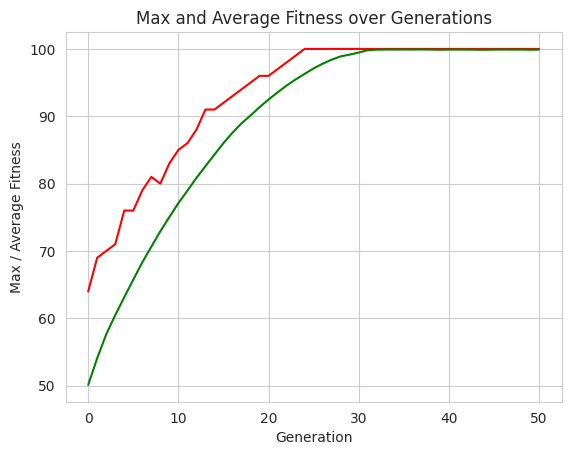

In [9]:
# create initial population (generation 0):
population = toolbox.populationCreator(n=POPULATION_SIZE)

# prepare the statistics object:
stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("max", numpy.max)
stats.register("avg", numpy.mean)

# define the hall-of-fame object:
hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

# perform the Genetic Algorithm flow with hof feature added:
population, logbook = algorithms.eaSimple(population, toolbox, cxpb=P_CROSSOVER, mutpb=P_MUTATION,
                                            ngen=MAX_GENERATIONS, stats=stats, halloffame=hof, verbose=True)

# print Hall of Fame info:
print("Hall of Fame Individuals = ", *hof.items, sep="\n")
print("Best Ever Individual = ", hof.items[0])

# extract statistics:
maxFitnessValues, meanFitnessValues = logbook.select("max", "avg")

# plot statistics:
sns.set_style("whitegrid")
plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Max / Average Fitness')
plt.title('Max and Average Fitness over Generations')

plt.show()
